# TAOS mars3D: overview daily files

First look at data

In [1]:
import os
from glob import glob
from tqdm import tqdm

import numpy as np
import xarray as xr
import pandas as pd

import dask
from dask import delayed

from matplotlib import pyplot as plt
%matplotlib inline

import taos.utils as ut
import taos.mars as ms
import taos.drifters as dr

In [2]:
if True:
    from dask.distributed import Client
    from dask_jobqueue import PBSCluster
    cluster = PBSCluster()
    #cluster = PBSCluster(processes=4, cores=4) # std
    w = cluster.scale(jobs=5)
    client = Client(cluster)
    client
else:
    from dask.distributed import Client, LocalCluster
    #
    cluster = LocalCluster()
    client = Client(cluster)
    client

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/dask_jobqueue/core.py:19: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import format_bytes, parse_bytes, tmpfile
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/dask_jobqueue/core.py:19: FutureWarning: parse_bytes is deprecated and will be removed in a future release. Please use dask.utils.parse_bytes instead.
  from distributed.utils import format_bytes, parse_bytes, tmpfile
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/dask_jobqueue/core.py:19: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import format_bytes, parse_bytes, tmpfile
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/dask_jobqueue/htcondor.py:6: FutureWarning: pars

---

## load data subset


In [3]:
year = "2010"
year = None

files = ms.browse_files(year=year, daily=True)
print("Number of data files = {} ".format(len(files)))

Number of data files = 3283 


In [4]:
# select 4 times spread over 2010
files_selected = [files.loc["2010-{:2d}-03 12:00:00".format(n), "files"] for n in range(1,12, 3)]
ds = xr.concat([ms.read_one_file(f, z=True) for f in files_selected], dim="time")

xgrid = ms.get_xgrid(ds)

In [6]:
ds = ds.persist()

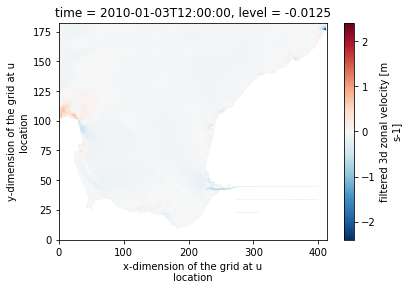

In [12]:
ds.UZ.sel(time="2010-01-03", level=0, method="nearest").squeeze().plot()

In [14]:
ds

<xarray.Dataset>
Dimensions:      (time: 4, nj: 183, ni: 413, ni_u: 413, nj_v: 183, level: 40)
Coordinates: (12/13)
  * time         (time) datetime64[ns] 2010-01-03T12:00:00 ... 2010-10-03T12:...
    latitude     (nj, ni) float64 49.24 49.24 49.24 49.24 ... 50.06 50.06 50.06
    latitude_u   (time, nj, ni_u) float64 dask.array<chunksize=(1, 183, 413), meta=np.ndarray>
    latitude_v   (time, nj_v, ni) float64 dask.array<chunksize=(1, 183, 413), meta=np.ndarray>
  * level        (level) float32 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
    longitude    (nj, ni) float64 -1.46 -1.453 -1.446 -1.44 ... 1.29 1.297 1.304
    ...           ...
    longitude_v  (time, nj_v, ni) float64 dask.array<chunksize=(1, 183, 413), meta=np.ndarray>
  * ni           (ni) float32 0.0 1.0 2.0 3.0 4.0 ... 409.0 410.0 411.0 412.0
  * ni_u         (ni_u) float32 0.5 1.5 2.5 3.5 4.5 ... 409.5 410.5 411.5 412.5
  * nj           (nj) float32 0.0 1.0 2.0 3.0 4.0 ... 179.0 180.0 181.0 182.0
  * nj_v         (nj_v) float32 0.5 1.5 2.5 3.5 4.5 ... 179.5 180.5 181.5 182.5
    z            (time, level, nj, ni) float32 dask.array<chunksize=(1, 1, 183, 413), meta=np.ndarray>
Data variables: (12/18)
    H0           (time, nj, ni) float32 dask.array<chunksize=(1, 183, 413), meta=np.ndarray>
    hc           (time, nj, ni) float32 dask.array<chunksize=(1, 183, 413), meta=np.ndarray>
    HX           (time, nj, ni_u) float32 dask.array<chunksize=(1, 183, 413), meta=np.ndarray>
    HY           (time, nj_v, ni) float32 dask.array<chunksize=(1, 183, 413), meta=np.ndarray>
    Csu_sig      (time, level) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    SIG          (time, level) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...           ...
    VZ           (time, level, nj_v, ni) float32 dask.array<chunksize=(1, 1, 183, 413), meta=np.ndarray>
    SAL          (time, level, nj, ni) float32 dask.array<chunksize=(1, 1, 183, 413), meta=np.ndarray>
    TEMP         (time, level, nj, ni) float32 dask.array<chunksize=(1, 1, 183, 413), meta=np.ndarray>
    SA           (time, level, nj, ni) float64 dask.array<chunksize=(1, 1, 183, 413), meta=np.ndarray>
    CT           (time, level, nj, ni) float64 dask.array<chunksize=(1, 1, 183, 413), meta=np.ndarray>
    sigma0       (time, level, nj, ni) float64 dask.array<chunksize=(1, 1, 183, 413), meta=np.ndarray>
Attributes: (12/58)
    CDI:                       Climate Data Interface version 1.5.0 (http://c...
    institution:               IFREMER
    Conventions:               CF-1.6 OCO-1.3.1 COMODO-1.0
    limi:                      0
    lima:                      412
    pasi:                      1
    ...                        ...
    CDO:                       Climate Data Operators version 1.5.0 (http://c...
    NCO:                       4.0.6
    history:                   Tue Mar 22 10:21:53 2016: ncks -A -v b,theta,C...
    product_name:              MARC_F1-MARS3D-SEINE_20100103T1200Z_FILTRE.nc
    field_type:                1-daily
    comment:                   Demerliac filtering of MARC_F1-MARS3D-SEINE500...

In [ ]:
ds = xr.open_dataset("myfile.nc")

---

### plot snapshots of surface fields

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0

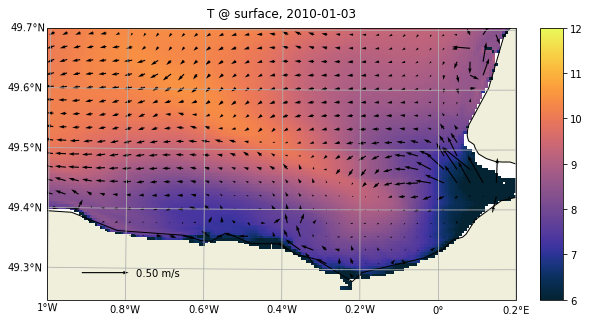

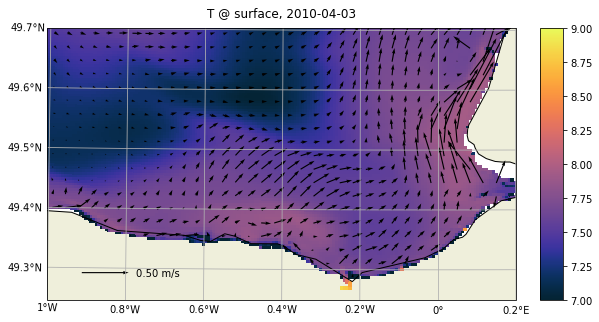

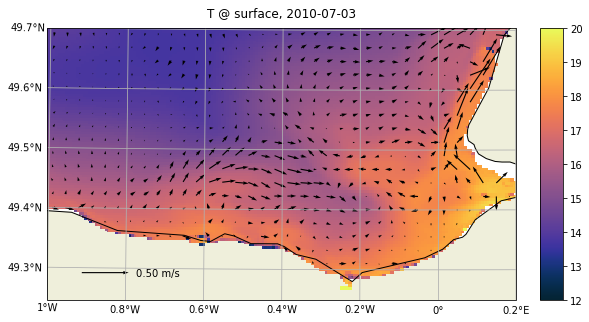

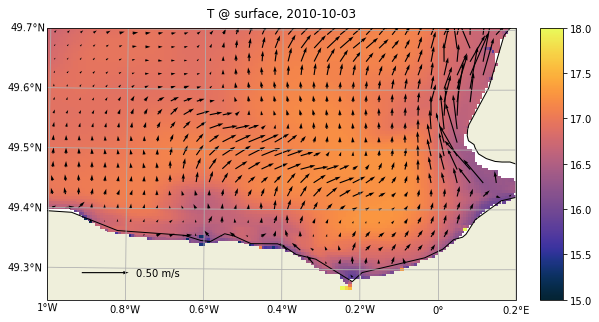

In [5]:
clims = [[6,12], [7,9], [12,20], [15, 18]]

plot_uv=True

for t, clim in zip(ds.time, clims):
    _ds = ds.sel(time=t, level=0, method="nearest")

    if plot_uv:
        uv = ms.prepare_uv(_ds.UZ, _ds.VZ, _ds, xgrid, dij=5)
    else:
        uv = None
    
    ms.plot_bs(_ds["TEMP"], 
               uv=uv,
               title="T @ surface, "+str(t.dt.strftime("%Y-%m-%d").values),
               vmin=clim[0], vmax=clim[1],
               cmap=ms.cm.thermal,
               zoom=1, figsize=0,
              )

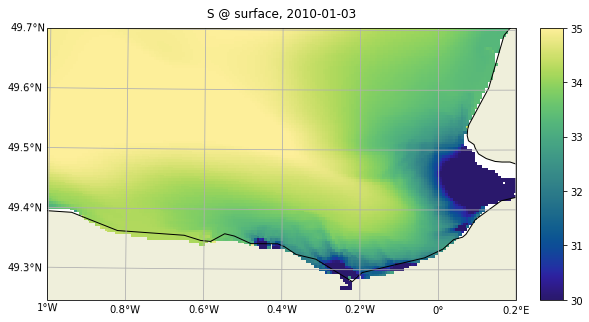

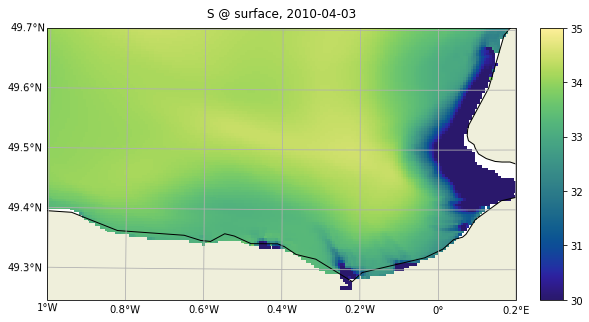

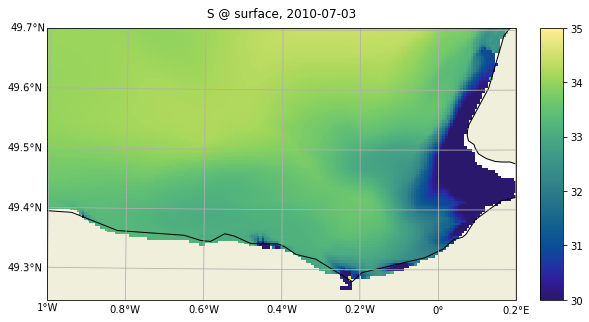

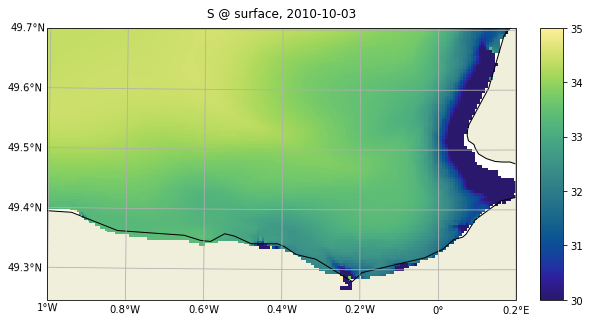

In [14]:
for t, clim in zip(ds.time, clims):
    ms.plot_bs(ds["SAL"].sel(time=t, level=0, method="nearest"), 
               title="S @ surface, "+str(t.dt.strftime("%Y-%m-%d").values),
               vmin=30, vmax=35,
               cmap=ms.cm.haline,
               zoom=1, figsize=0,
              )

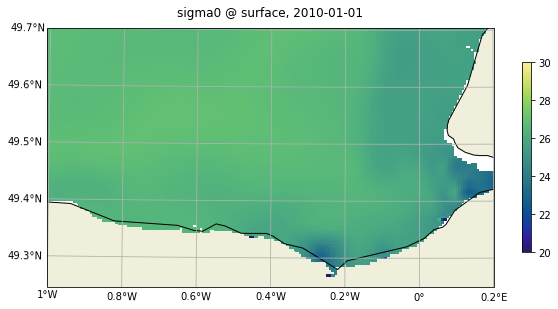

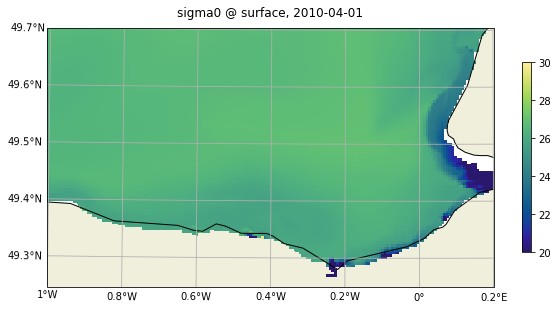

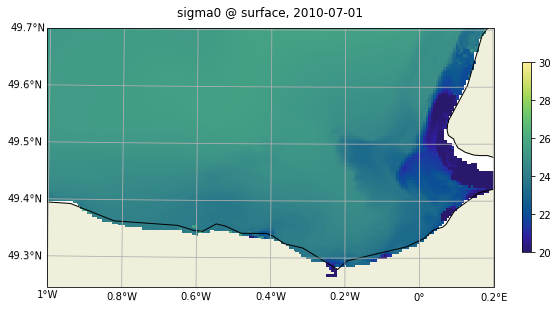

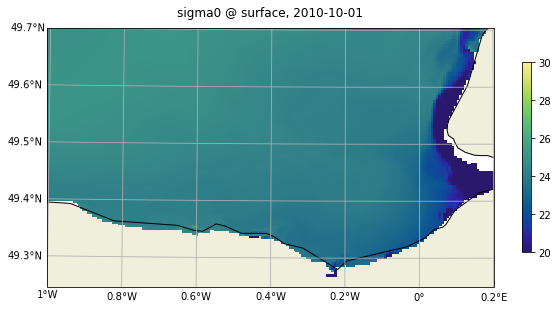

In [11]:
for t, clim in zip(ds.time, clims):
    ms.plot_bs(ds["sigma0"].sel(time=t, level=0, method="nearest"), 
               title="sigma0 @ surface, "+str(t.dt.strftime("%Y-%m-%d").values),
               vmin=20, vmax=30,
               cmap=ms.cm.haline,
               zoom=1, figsize=0,
              )

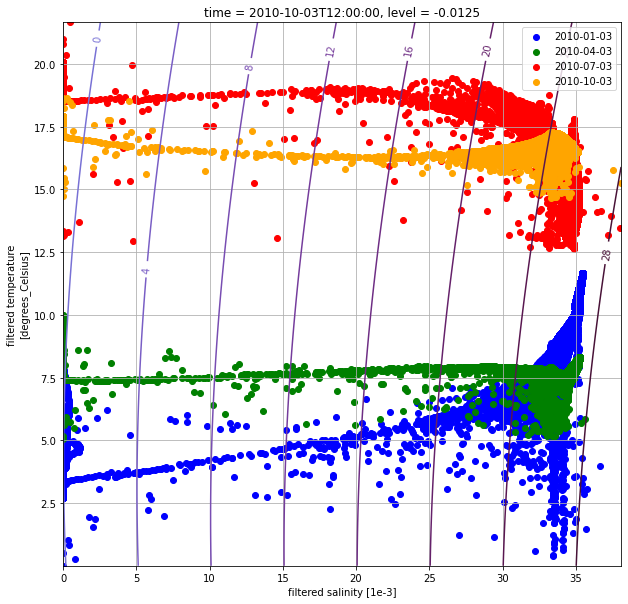

In [15]:
_ds = ds.sel(level=0, method="nearest")
colors = ["b", "g", "r", "orange"]

fig, ax = ms.TS_plot(_ds, t_range=None, s_range=None, figsize=(10,10))

for t, c in zip(_ds.time, colors):
    _dst = _ds.sel(time=t)
    xr.plot.scatter(_dst, y="TEMP", x="SAL", ax=ax, color=c, label=str(t.dt.strftime("%Y-%m-%d").values))
ax.legend()

---

### vertical slices

In [5]:
idx = ms.get_horizontal_indices(ds.isel(time=0), lon=-0.25, lat=49.3)

#i = 180
i = int(idx["rho"]["ni"])
dsi = ds.isel(ni=i, ni_u=i).persist()

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0

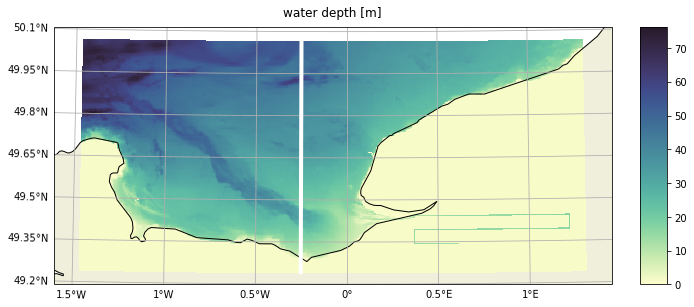

In [11]:
fac = ms.plot_bs(-ds["z"].isel(time=0, level=0), 
           title="water depth [m]",
           vmin=0,
           cmap=ms.cm.deep,
           zoom=0, figsize=0,
          )

fac["ax"].plot(dsi.longitude, dsi.latitude, 
               color="w", lw=4,
               transform=ms.ccrs.PlateCarree())

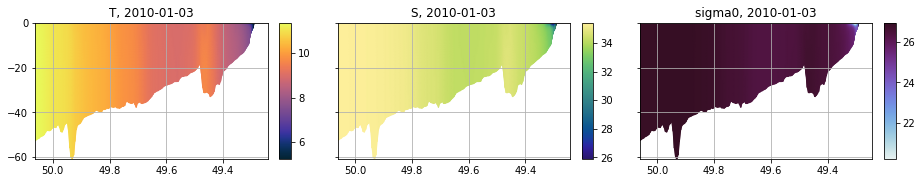

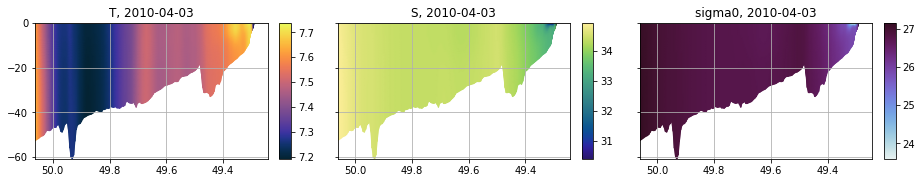

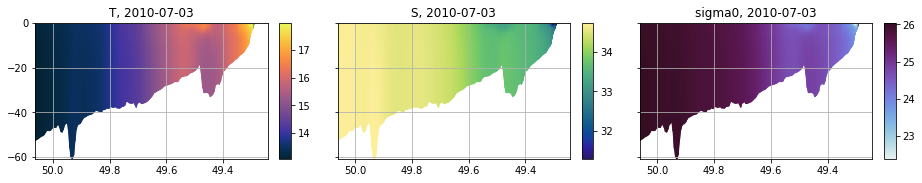

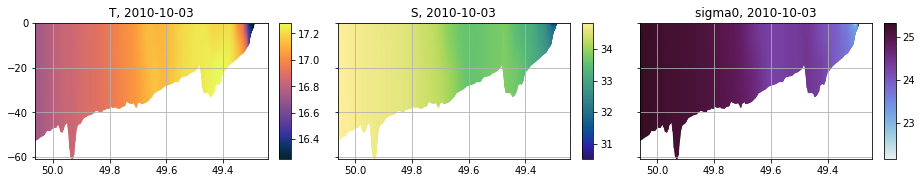

In [12]:
for t in dsi.time:

    _ds = dsi.sel(time=t)
        
    fig = plt.figure(figsize=(15,2.5))
    spec = fig.add_gridspec(ncols=3, nrows=1, wspace=0.3)

    ax = fig.add_subplot(spec[0])    
    ms.plot_section(_ds["TEMP"], "latitude",
                    ax=ax, fig=fig,
                    title="T, "+str(t.dt.strftime("%Y-%m-%d").values),
                    cmap=ms.cm.thermal,
                    colorbar=True,
                    #colorbar_kwargs=cbark,
                   )
    ax = fig.add_subplot(spec[1])
    ms.plot_section(_ds["SAL"], "latitude",
                    ax=ax, fig=fig,
                    title="S, "+str(t.dt.strftime("%Y-%m-%d").values),
                    cmap=ms.cm.haline,
                    ylabel=False,
                   )
    ax = fig.add_subplot(spec[2])    
    ms.plot_section(_ds["sigma0"], "latitude",
                    ax=ax, fig=fig,
                    title="sigma0, "+str(t.dt.strftime("%Y-%m-%d").values),
                    cmap=ms.cm.dense,
                    ylabel=False,
                   )
    

### anomalies with respect to bottom values

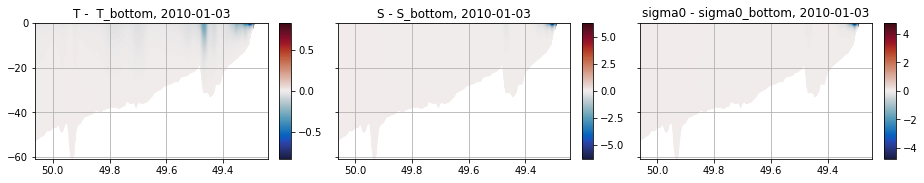

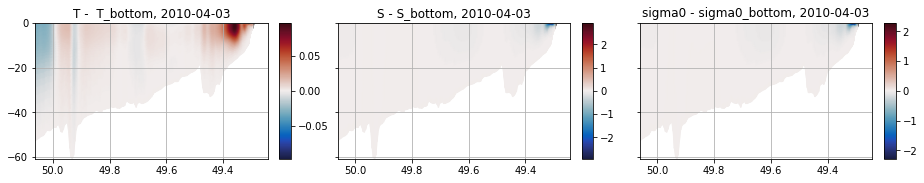

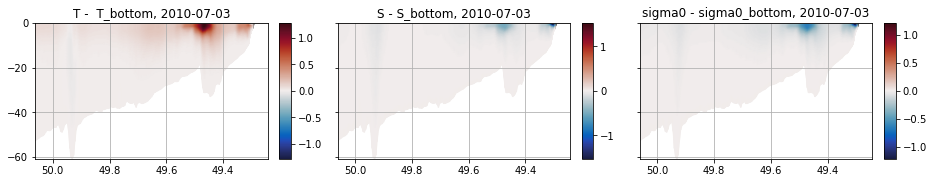

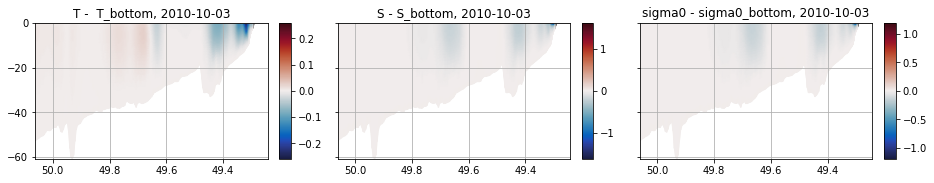

In [12]:
for t in dsi.time:

    _ds = dsi.sel(time=t)
    
    fig = plt.figure(figsize=(15,2.5))
    spec = fig.add_gridspec(ncols=3, nrows=1, wspace=0.3)

    _da = _ds["TEMP"] - _ds["TEMP"].isel(level=0)
    _da["z"] = _ds["z"]
    ax = fig.add_subplot(spec[0])
    ms.plot_section(_da, "latitude",
                    ax=ax, fig=fig,
                    title="T -  T_bottom, "+str(t.dt.strftime("%Y-%m-%d").values),
                    cmap=ms.cm.balance,
                    center_colormap=True,
                   )
    #
    _da = _ds["SAL"] - _ds["SAL"].isel(level=0)
    _da["z"] = _ds["z"]
    ax = fig.add_subplot(spec[1])    
    ms.plot_section(_da, "latitude",
                    ax=ax, fig=fig,
                    title="S - S_bottom, "+str(t.dt.strftime("%Y-%m-%d").values),
                    cmap=ms.cm.balance,
                    center_colormap=True,
                    ylabel=False,
                   )
    #
    _da = _ds["sigma0"] - _ds["sigma0"].isel(level=0)
    _da["z"] = _ds["z"]
    ax = fig.add_subplot(spec[2])
    ms.plot_section(_da, "latitude",
                    ax=ax, fig=fig,
                    title="sigma0 - sigma0_bottom, "+str(t.dt.strftime("%Y-%m-%d").values),
                    cmap=ms.cm.balance,
                    center_colormap=True,
                    ylabel=False,
                   )    
    

### Look at time series of surface and bottom values

In [13]:
import dask
from dask import delayed

In [45]:
#i=180
_preprocess = lambda ds: ds.isel(ni=i, ni_f=i, ni_u=i, ni_v=i)
    
def combine_files(df):
    with dask.config.set(scheduler="threads"):    
        ds = xr.open_mfdataset(df["files"],
                               concat_dim="time", 
                               preprocess=_preprocess, 
                               combine="nested",
                               coords="minimal",
                               compat="override",
                               data_vars=["XE", "U", "V", "UZ", "VZ", "SAL", "TEMP"],
                              )
        return ds #.mean("time", keep_attrs=True) # persist here?

combine_files_delayed = delayed(combine_files)

In [54]:
def process_top(files, label, freq="10D", overwrite=False):

    zarr = os.path.join(ms.diag_dir, "vsection_i{}_{}.zarr".format(i, label))
    
    if not os.path.isdir(zarr) or overwrite:
    
        delayed_outputs = [combine_files_delayed(g) 
                           for label, g in files.groupby(pd.Grouper(freq=freq))
                          ]
        outputs = dask.compute(delayed_outputs)

        ds = xr.combine_nested(outputs[0], 
                               concat_dim=["time"], 
                               coords="minimal",
                               compat="override",
                              )
        
        ds = ds.assign_coords(z = ms.get_z(ds).transpose("time", "level", "nj"))
        ds = ms.add_eos(ds)
        
        ds.to_zarr(zarr, mode="w")


In [55]:
# dev
#label = "2011"
#g = files.loc[label]
#process_top(g, label, overwrite=True) 

In [56]:
for label, g in tqdm(files.groupby(pd.Grouper(freq="1Y"))):
    process_top(g, label.strftime("%Y"), overwrite=True) 

100%|██████████| 9/9 [03:46<00:00, 25.20s/it]


### reload and plot

In [6]:
zarrs = sorted(glob(os.path.join(ms.diag_dir, "vsection_i{}_*.zarr".format(i))))
ds = xr.concat([xr.open_zarr(z) for z in zarrs], dim="time")
ds = ds.chunk(dict(time=360)).persist()

In [7]:
def plot(temp, sal, sigma,
         t_min=None, t_max=None,
         s_min=None, s_max=None,
         sig_min=None, sig_max=None,
         cmaps=["thermal", "haline", "dense"],
        ):

    fig = plt.figure(figsize=(15,10))
    spec = fig.add_gridspec(ncols=1, nrows=3, wspace=0.3)

    ax = fig.add_subplot(spec[0])
    da = _rename_nj(temp)
    da.plot(x="time", y="latitude", ax=ax, cmap=getattr(ms.cm, cmaps[0]),
              vmin=t_min, vmax=t_max,
             )
    ax.set_xticklabels("")
    ax.set_xlabel("")
    ax.grid()
    ax.set_title(temp.name)
    #
    ax = fig.add_subplot(spec[1])
    da = _rename_nj(sal)
    da.plot(x="time", y="latitude", ax=ax, cmap=getattr(ms.cm, cmaps[1]),
             vmin=s_min, vmax=s_max,
            )
    ax.set_xticklabels("")
    ax.set_xlabel("")
    ax.grid()
    ax.set_title(sal.name)
    #
    ax = fig.add_subplot(spec[2])
    da = _rename_nj(sigma)
    da.plot(x="time", y="latitude", ax=ax, cmap=getattr(ms.cm, cmaps[2]),
               vmin=sig_min, vmax=sig_max,
              )
    ax.grid()
    ax.set_title(sigma.name)
    
def _rename_nj(da):
    if "nj_u" in da.dims:
        da = da.rename(nj_u="nj")
    elif "nj_v" in da.dims:
        #da = da.isel(nj_v=slice(0,-1))
        da = da.rename(nj_v="nj")
    if "latitude" not in da.coords:
        da = da.assign_coords(latitude=("nj", ds.latitude.values))
    return da
    

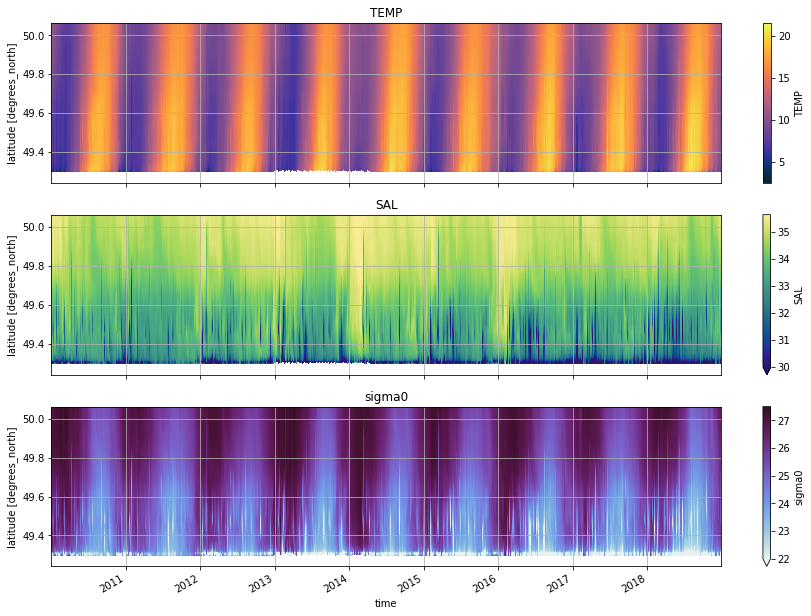

In [8]:
_ds = ds.isel(level=-1)
plot(_ds.TEMP, _ds.SAL, _ds.sigma0, s_min=30, sig_min=22)

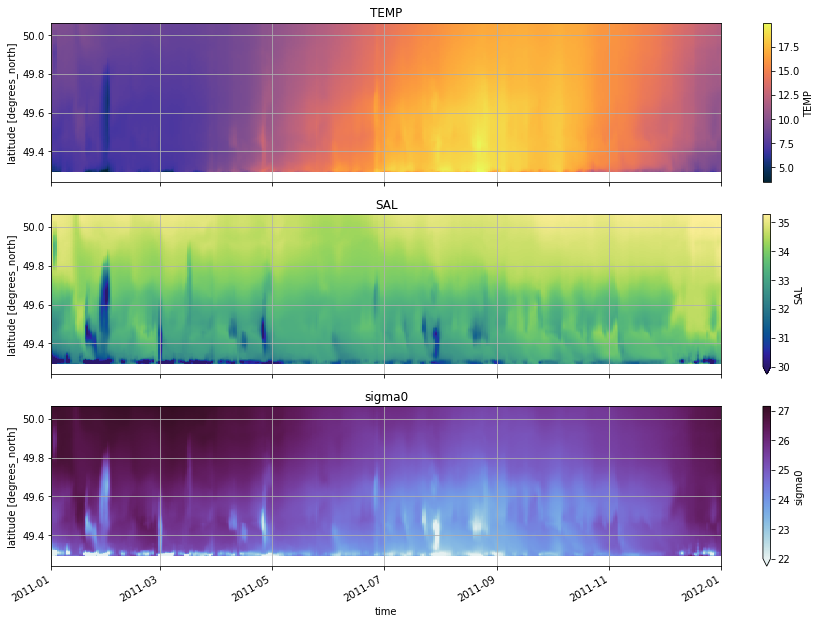

In [9]:
_ds = ds.isel(level=-1).sel(time="2011")
plot(_ds.TEMP, _ds.SAL, _ds.sigma0, s_min=30, sig_min=22)

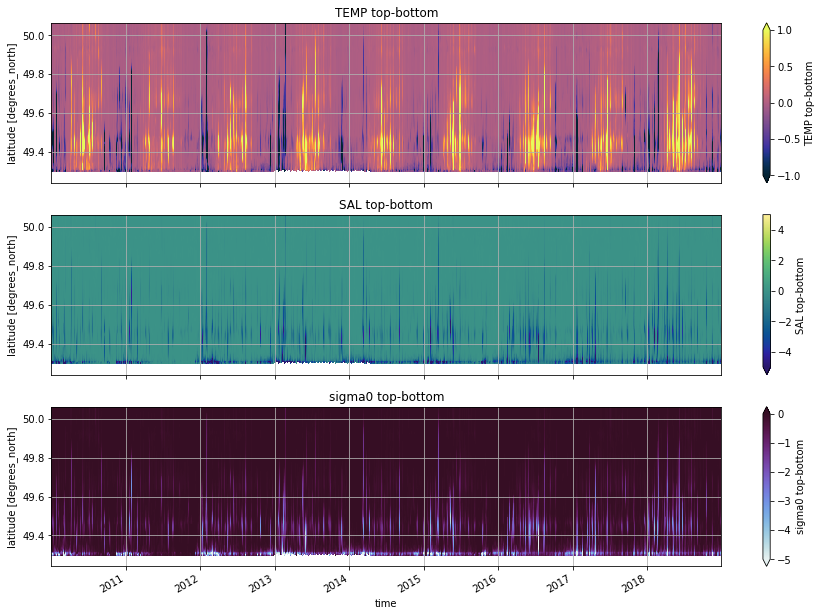

In [10]:
top = ds.isel(level=-1) 
bottom = ds.isel(level=0) 

plot(*[(top[v]-bottom[v]).rename(v+" top-bottom") for v in ["TEMP", "SAL", "sigma0"]],
     t_max=-1, t_min=1.,
     s_min=-5, s_max=5,
     sig_min=-5, sig_max=0,
    )


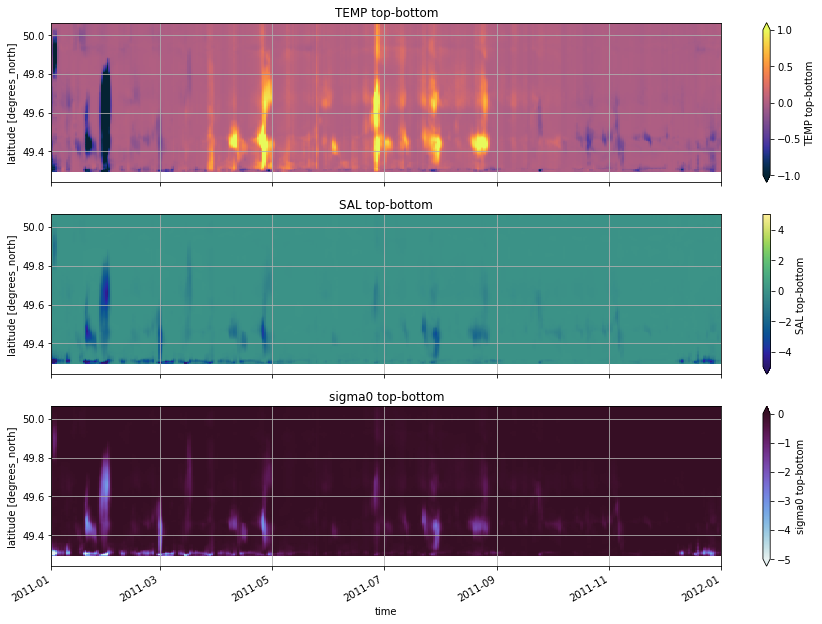

In [11]:
_ds = ds.sel(time="2011")
top = _ds.isel(level=-1)
bottom = _ds.isel(level=0)

plot(*[(top[v]-bottom[v]).rename(v+" top-bottom") for v in ["TEMP", "SAL", "sigma0"]],
     t_max=-1, t_min=1.,
     s_min=-5, s_max=5,
     sig_min=-5, sig_max=0,
    )

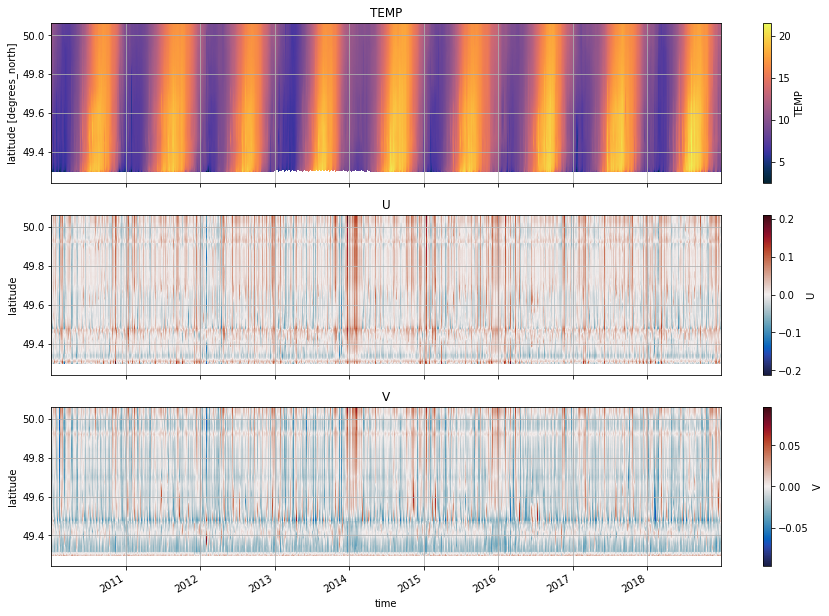

In [12]:
_ds = ds
plot(_ds.isel(level=-1).TEMP, _ds.U, _ds.V, cmaps=["thermal", "balance", "balance"])

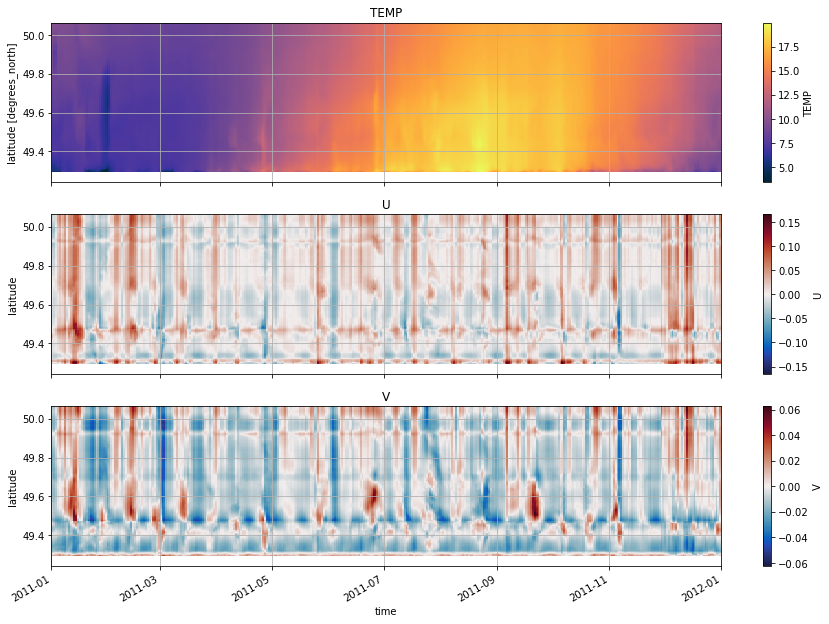

In [13]:
_ds = ds.sel(time="2011")
plot(_ds.isel(level=-1).TEMP, _ds.U, _ds.V, cmaps=["thermal", "balance", "balance"])

In [14]:
dsh = ut.predict_tides(_ds.time, real=False, summed=False)
envelope = abs(dsh["complex"].where( (dsh.frequency>1.5) & (dsh.frequency<2.5)).sum("constituent"))
#_ds["tidal_envelope"] = ("date_start", envelope.data)
#_ds["tidal_envelope"].plot(x="date_start")

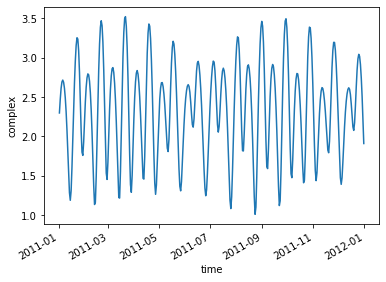

In [16]:
envelope.plot()

---

### make figures for movie: surface properties


In [53]:
def gen_fig(f, v=None, **kwargs):
        
    #dask.config.set(scheduler="threads")
    
    # load and massage file
    ds = xr.open_dataset(f)

    # add vertical coordinate and eos variables
    ds = ds.assign_coords(z = ms.get_z(ds).transpose("time", "level", "nj", "ni"))
    ds = ms.add_eos(ds)

    #
    out_dir = "/home1/scratch/aponte/figs/"
    fig_path = out_dir+ds.time.dt.strftime("%Y-%m-%d_%H%M%S").values[0]+".png"
    
    ms.plot_bs(ds[v].sel(level=0, method="nearest"),
               title=v+" @ surface, "+str(ds.time.dt.strftime("%Y-%m-%d %H:%M:%S").values),
               offline=True,
               savefig=fig_path,
               **kwargs
              )
    
    return fig_path

from dask.delayed import delayed
delayed_fig = delayed(gen_fig)

In [12]:
#

file_subset = files["2010-01-01":"2010-02-01"]
file_subset = files["2010-04-01":"2010-05-01"]
file_subset = files["2010-07-01":"2010-08-01"]
#file_subset = files["2010-10-01":"2010-11-01"]

#
#kwargs = dict(v="TEMP", cmap=ms.cm.thermal) # need to be redone
#kwargs = dict(v="TEMP", zoom=1, cmap=ms.cm.thermal)
#kwargs = dict(v="SAL", vmin=30, vmax=35, cmap=ms.cm.haline)
#kwargs = dict(v="SAL", zoom=1, vmin=30, vmax=35, cmap=ms.cm.haline)
kwargs = dict(v="SAL", zoom=1, vmin=30, vmax=35, cmap=ms.cm.haline)


In [ ]:
#
Nb = len(client.nthreads())
rg = range(0, file_subset.size)
if len(rg)/Nb>1:
    II = np.array_split(rg,len(rg)/Nb)
else:
    II = [list(rg)]
print('%d batches to be done'%len(II))

for I in tqdm(II):
    #print(' batch %d-%d'%(I[0],I[-1]))
    values = [delayed_fig(file_subset.iloc[i,0], **kwargs) for i in I]
    futures = client.compute(values)
    results = client.gather(futures)

print(" ! done !")

In [26]:
import threading


def gen_fig(f, t=None, s=None, ta=None, sa=None):
    
    #
    MPL_LOCK = threading.Lock()
    with MPL_LOCK:
        
        plt.switch_backend("agg")
    
        # load and massage file
        ds = xr.open_dataset(f)

        # add vertical coordinate and eos variables
        ds = ds.assign_coords(z = ms.get_z(ds).transpose("time", "level", "nj", "ni"))
        ds = ms.add_eos(ds)
            
        #
        out_dir = "/home1/scratch/aponte/figs/"
        fig_path = out_dir+ds.time.dt.strftime("%Y-%m-%d_%H%M%S").values[0]+".png"
        dtime = str(ds.time.dt.strftime("%Y-%m-%d %H:%M:%S").values[0])

        ds = ds.squeeze()

        fig = plt.figure(figsize=(15,10), constrained_layout=False)
        spec = fig.add_gridspec(ncols=2, nrows=2, wspace=0.3, left=.05, right=0.9)
        
        _da = ds["TEMP"].sel(level=0, method="nearest")
        ax = fig.add_subplot(spec[0,0], projection=ms.ccrs.Orthographic(0., 49.5))        
        ms.plot_bs(_da,
               ax=ax, fig=fig,                
               title="T @ surface, "+dtime,
               cmap=ms.cm.thermal,
               **t,
              )
        #
        _da = ds["SAL"].sel(level=0, method="nearest")
        ax = fig.add_subplot(spec[0,1], projection=ms.ccrs.Orthographic(0., 49.5))
        ms.plot_bs(_da,
               ax=ax, fig=fig,
               title="S @ surface, "+dtime,
               cmap=ms.cm.haline,
               **s,
              )
        #
        _da = ds["TEMP"].sel(level=0, method="nearest") - ds["TEMP"].isel(level=0)
        ax = fig.add_subplot(spec[1,0], projection=ms.ccrs.Orthographic(0., 49.5))
        ms.plot_bs(_da,
               ax=ax, fig=fig,
               title="T -  T_bottom, "+dtime,
               cmap=ms.cm.balance,
               #center_colormap=True,
               **ta,
              )
        #
        _da = ds["SAL"].sel(level=0, method="nearest") - ds["SAL"].isel(level=0)
        ax = fig.add_subplot(spec[1,1], projection=ms.ccrs.Orthographic(0., 49.5))
        ms.plot_bs(_da,
               ax=ax, fig=fig,
               title="S @ surface, "+dtime,
               cmap=ms.cm.balance,
               #center_colormap=True,
               **sa,
              )

        #
        fig.savefig(fig_path, dpi=150) #, bbox_inches = "tight"
        plt.close(fig)
        
    return fig_path

from dask.delayed import delayed
delayed_fig = delayed(gen_fig)

In [29]:
#

file_subset = files["2010-01-01":"2010-02-01"]
#file_subset = files["2010-04-01":"2010-05-01"]
#file_subset = files["2010-07-01":"2010-08-01"]
#file_subset = files["2010-10-01":"2010-11-01"]

file_subset = files["2010-01-01":"2011-01-01"]

#
#kwargs = dict(v="TEMP", cmap=ms.cm.thermal) # need to be redone
#kwargs = dict(v="TEMP", zoom=1, cmap=ms.cm.thermal)
#kwargs = dict(v="SAL", vmin=30, vmax=35, cmap=ms.cm.haline)
#kwargs = dict(v="SAL", zoom=1, vmin=30, vmax=35, cmap=ms.cm.haline)

zoom=1
tk = dict(zoom=zoom)
tak = dict(zoom=zoom, vmin=-2, vmax=2)
sk = dict(zoom=zoom, vmin=30, vmax=35)
sak = dict(zoom=zoom, vmin=-10, vmax=10)
kwargs = dict(t=tk, s=sk, ta=tak, sa=sak)

In [30]:
#
Nb = len(client.nthreads())
rg = range(0, file_subset.size)
if len(rg)/Nb>1:
    II = np.array_split(rg,len(rg)/Nb)
else:
    II = [list(rg)]
print('%d batches to be done'%len(II))

for I in tqdm(II):
    #print(' batch %d-%d'%(I[0],I[-1]))
    values = [delayed_fig(file_subset.iloc[i,0], **kwargs) for i in I]
    futures = client.compute(values)
    results = client.gather(futures)

print(" ! done !")

250 batches to be done


100%|██████████| 250/250 [16:49<00:00,  4.04s/it]

 ! done !


---

### make figures for movie: vertical slices

In [ ]:
def gen_fig(f, v=None, i=None, j=None, **kwargs):
    
    # load and massage file
    ds = xr.open_dataset(f)
    
    # add vertical coordinate and eos variables
    ds = ds.assign_coords(z = ms.get_z(ds).transpose("time", "level", "nj", "ni"))
    ds = ms.add_eos(ds)

    if i is not None:
        ds = ds.isel(ni=i, ni_f=i, ni_u=i, ni_v=i)
    if j is not None:
        ds = ds.isel(ni=j, ni_f=j, ni_u=j, ni_v=j)
        
    #
    out_dir = "/home1/scratch/aponte/figs/"
    fig_path = out_dir+ds.time.dt.strftime("%Y-%m-%d_%H%M%S").values[0]+".png"
    
    ms.plot_section(ds[v], "latitude",
                    ax=axes[0], fig=fig,
                    title=v+" "+str(ds.time.dt.strftime("%Y-%m-%d").values),
                    offline=True,
                    savefig=fig_path,
                    **kwargs,
                   )
    
    return fig_path

from dask.delayed import delayed
delayed_fig = delayed(gen_fig)

In [13]:
import threading

def gen_fig(f, i=None, j=None, t=None, s=None, ta=None, sa=None):
    
    #
    MPL_LOCK = threading.Lock()
    with MPL_LOCK:
        
        plt.switch_backend("agg")
    
        # load and massage file
        ds = xr.open_dataset(f)

        # add vertical coordinate and eos variables
        ds = ds.assign_coords(z = ms.get_z(ds).transpose("time", "level", "nj", "ni"))
        ds = ms.add_eos(ds)

        if i is not None:
            ds = ds.isel(ni=i, ni_f=i, ni_u=i, ni_v=i)
        if j is not None:
            ds = ds.isel(ni=j, ni_f=j, ni_u=j, ni_v=j)
            
        #
        out_dir = "/home1/scratch/aponte/figs/"
        fig_path = out_dir+ds.time.dt.strftime("%Y-%m-%d_%H%M%S").values[0]+".png"
        dtime = str(ds.time.dt.strftime("%Y-%m-%d %H:%M:%S").values[0])

        ds = ds.squeeze()

        fig = plt.figure(figsize=(15,5), constrained_layout=False)
        spec = fig.add_gridspec(ncols=2, nrows=2, wspace=0.3, left=.05, right=0.9)
        
        _da = ds["TEMP"]
        ax = fig.add_subplot(spec[0,0])
        ms.plot_section(_da, "latitude",
                        ax=ax, fig=fig,
                        title="T, "+dtime,
                        cmap=ms.cm.thermal,
                        xlabel=False,
                        **t,
                       )
        #
        _da = ds["SAL"]
        ax = fig.add_subplot(spec[0,1])
        ms.plot_section(_da, "latitude",
                        ax=ax, fig=fig,
                        title="S, "+dtime,
                        cmap=ms.cm.haline,
                        ylabel=False,
                        xlabel=False,
                        **s,
                       )
        #
        _da = ds["TEMP"] - ds["TEMP"].isel(level=0)
        _da["z"] = ds["z"]
        ax = fig.add_subplot(spec[1,0])
        ms.plot_section(_da, "latitude",
                        ax=ax, fig=fig,
                        title="T -  T_bottom, "+dtime,
                        cmap=ms.cm.balance,
                        #center_colormap=True,
                        **ta,
                       )
        #
        _da = ds["SAL"] - ds["SAL"].isel(level=0)
        _da["z"] = ds["z"]
        ax = fig.add_subplot(spec[1,1])
        ms.plot_section(_da, "latitude",
                        ax=ax, fig=fig,
                        title="S - S_bottom, "+dtime,
                        cmap=ms.cm.balance,
                        #center_colormap=True,
                        ylabel=False,
                        **sa
                       )        

        #
        fig.savefig(fig_path, dpi=150) #bbox_inches = "tight"
        plt.close(fig)
        
    return fig_path

from dask.delayed import delayed
delayed_fig = delayed(gen_fig)

In [16]:
#

#file_subset = files["2010-01-01":"2010-01-05"] # dev
#file_subset = files["2010-01-01":"2010-02-01"]
#file_subset = files["2010-04-01":"2010-05-01"]
#file_subset = files["2010-07-01":"2010-08-01"]
#file_subset = files["2010-10-01":"2010-11-01"]

file_subset = files["2010-01-01":"2011-01-01"]

i = 180

#
#kwargs = dict(v="TEMP", cmap=ms.cm.thermal) # need to be redone
#kwargs = dict(v="TEMP", zoom=1, cmap=ms.cm.thermal)
#kwargs = dict(v="SAL", vmin=30, vmax=35, cmap=ms.cm.haline)
#kwargs = dict(v="SAL", i=i, zoom=1, vmin=30, vmax=35, cmap=ms.cm.haline)

kwargs = dict(i=i)

tk = dict()
tak = dict(vmin=-2, vmax=2)
sk = dict(vmin=30, vmax=35)
sak = dict(vmin=-10, vmax=10)
kwargs = dict(**kwargs, t=tk, s=sk, ta=tak, sa=sak)

In [17]:
#
Nb = len(client.nthreads())
rg = range(0, file_subset.size)
if len(rg)/Nb>1:
    II = np.array_split(rg,len(rg)/Nb)
else:
    II = [list(rg)]
print('%d batches to be done'%len(II))

for I in tqdm(II):
    #print(' batch %d-%d'%(I[0],I[-1]))
    values = [delayed_fig(file_subset.iloc[i,0], **kwargs) for i in I]
    futures = client.compute(values)
    results = client.gather(futures)

print(" ! done !")

250 batches to be done


100%|██████████| 250/250 [11:48<00:00,  2.83s/it]

 ! done !


---

In [46]:
client.restart()

<Client: 'tcp://10.148.0.230:47356' processes=0 threads=0, memory=0 B>

In [17]:
cluster.close()

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/contextlib.py:120: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/contextlib.py:120: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/contextlib.py:120: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


In [15]:
for f in futures:
    f.cancel()